In [2]:
import numpy as np
import pandas as pd
import pickle

import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from cfg_global import project_folder_path
from spike_train_utils import get_lv, simulate_hawkes_thinning, get_trials
os.chdir(current_wd)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
fig_folder = project_folder_path + 'results\\synthetic\\fig_drafts_paper\\'

In [32]:
save_fig = True

In [ ]:
rate_hz     = [5, 10]
tau_ms      = 100
alpha       = 0.4 
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz[trial],
        tau_ms_=tau_ms,
        alpha_=alpha,
        duration_ms_=duration_ms,
        seed_=5  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains.append(spikes)

In [ ]:
rate_hz     = 5
tau_ms      = [100,200]
alpha       = 0.4
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains_taus = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms[trial],
        alpha_=alpha,
        duration_ms_=duration_ms,
        seed_=5  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains_taus.append(spikes)

In [ ]:
rate_hz     = 5
tau_ms      = 100
alpha       = [0.4, 0.8] 
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains_alpha = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms,
        alpha_=alpha[trial],
        duration_ms_=duration_ms,
        seed_=5  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains_alpha.append(spikes)

### Plots

#### Raster plots of spike trains

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(6, 8))

axes[0].plot(all_spike_trains[0], np.ones(len(all_spike_trains[0]))*0.1, '|', markersize=10, alpha=0.9)
axes[0].plot(all_spike_trains[1], np.zeros(len(all_spike_trains[1])), '|', markersize=10, alpha=1)

axes[1].plot(all_spike_trains_taus[0], np.ones(len(all_spike_trains_taus[0]))*0.1, '|', markersize=10, alpha=0.9)
axes[1].plot(all_spike_trains_taus[1], np.zeros(len(all_spike_trains_taus[1])), '|', markersize=10, alpha=1)

axes[2].plot(all_spike_trains_alpha[0], np.ones(len(all_spike_trains_alpha[0]))*0.1, '|', markersize=10, alpha=0.9)
axes[2].plot(all_spike_trains_alpha[1], np.zeros(len(all_spike_trains_alpha[1])), '|', markersize=10, alpha=1)

for ax in axes.flat:
    ax.set_ylim([-0.1, 0.2])
    ax.set_xlim([0, 10000])
    
sns.despine()

In [ ]:
def smoothed_rate(spike_times, T_ms=10000, dt_ms=1, sigma_ms=100):
    # 1) bin into dt_ms-wide bins
    edges = np.arange(0, T_ms + dt_ms, dt_ms)
    counts, _ = np.histogram(spike_times, bins=edges)

    # 2) smooth with a Gaussian (sigma in number of bins)
    sigma_bins = sigma_ms / dt_ms
    smooth_counts = gaussian_filter1d(counts.astype(float), sigma=sigma_bins)

    # 3) convert to Hz: (spikes per bin) / (bin_width in s)
    dt_s = dt_ms / 1000.0
    rate_hz = smooth_counts / dt_s

    # 4) bin‐centers for plotting
    t = edges[:-1] + dt_ms/2
    return t, rate_hz

fig, axes = plt.subplots(3,1, figsize=(6, 8))

for ax, trains in zip(axes,
                      [all_spike_trains,
                       all_spike_trains_taus,
                       all_spike_trains_alpha]):
    # ---- raster ----
    ax.plot(trains[0], np.ones(len(trains[0]))*0.15,  '|', ms=10, alpha=0.8)
    ax.plot(trains[1], np.ones(len(trains[1]))*0.1,         '|', ms=10, alpha=1.0)
    ax.set_ylim([-0.1, 0.2])
    ax.set_xlim([0, 10000])
    ax.set_ylabel('Spike')

    # ---- smoothed rate ----
    t0, r0 = smoothed_rate(trains[0])
    t1, r1 = smoothed_rate(trains[1])
    ax_rate = ax.twinx()
    ax_rate.plot(t0, r0, color='C0', alpha=0.6, label='Train 1 (Hz)')
    ax_rate.plot(t1, r1, color='C1', alpha=0.6, label='Train 2 (Hz)')
    ax_rate.set_ylim([0, 50])
    ax_rate.set_ylabel('Instantaneous rate (Hz)')

for ax in axes.flat:
   # ax.set_ylim([-0.1, 0.2])
    ax.set_xlim([7000, 9000])
    ax.set_xticks(np.linspace(7000, 9000, 5))
    ax.set_xticklabels(np.linspace(0, 2, 5))

sns.despine()
plt.tight_layout()

if save_fig:
    plt.savefig(fig_folder + 'data_gen_params_examples_7000_9000.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'data_gen_params_examples_7000_9000.svg' , bbox_inches='tight')

In [ ]:
palette = sns.color_palette('Blues', n_colors=100)

fig, ax = plt.subplots(figsize=(8, 1))
ax.imshow([palette], aspect='auto')
ax.set_axis_off()  # Hide axes for a cleaner look
plt.show()

fig.savefig(fig_folder + 'blues_palette.svg', bbox_inches='tight')
fig.savefig(fig_folder + 'blues_palette.png', bbox_inches='tight')

#### Schematic for making trials

In [5]:
rate_hz     = 5
tau_ms      = 100
alpha       = 0.4 
duration_ms = 30*1000    

# generate
num_trials = 3
all_spike_trains = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms,
        alpha_=alpha,
        duration_ms_=duration_ms,
        seed_=trial  # different seed per trial
    )
    print(f'fr {len(spikes)/30}')
    all_spike_trains.append(spikes)

fr 4.0
fr 5.5
fr 5.766666666666667


In [9]:
n_trials = 5 
m_iterations = 1

fs = 1000
signal_len = duration_ms
trial_len = int(1000 * (fs / 1000)) # 1000ms trials 

trial_dict = {}
for i in range(len(all_spike_trains)):
    print(f'Processing unit {i}')
    unit_trial_dict = {}
    for m in range(m_iterations):
        spikes = np.asarray([int(spike) for spike in all_spike_trains[i]])
        spikes_trials = get_trials(spikes, signal_len, n_trials, trial_len, verbose_=True)
        trial_dict[i] = spikes_trials

Processing unit 0
N trials 5, trail len 1000, n trial starts 5, 
trial starts [15759, 15314, 19896, 21505, 17584], 
trial starts [16759, 16314, 20896, 22505, 18584]
Processing unit 1
N trials 5, trail len 1000, n trial starts 5, 
trial starts [19056, 8761, 158, 21461, 13256], 
trial starts [20056, 9761, 1158, 22461, 14256]
Processing unit 2
N trials 5, trail len 1000, n trial starts 5, 
trial starts [8862, 19222, 11841, 13916, 10243], 
trial starts [9862, 20222, 12841, 14916, 11243]


In [12]:
trial_starts_unit0 = [19056, 8761, 158, 21461, 13256]

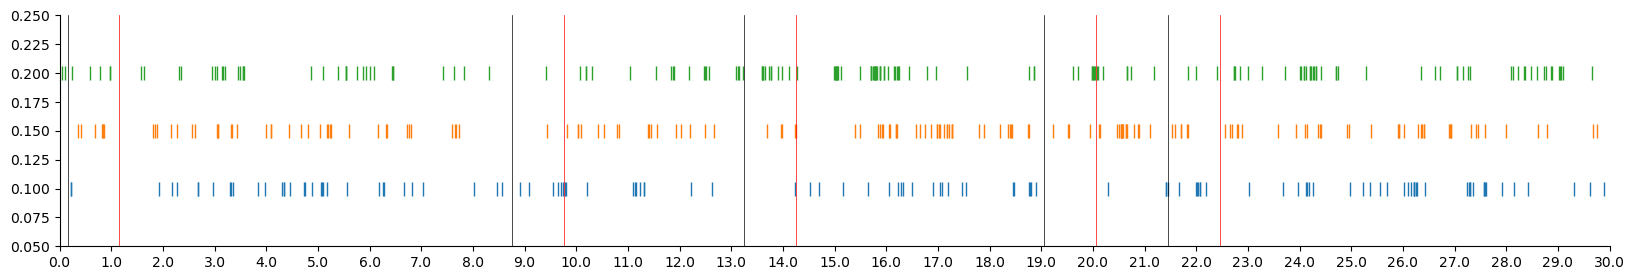

In [33]:
fig, axes = plt.subplots(1,1, figsize=(20, 3))

axes.plot(all_spike_trains[0], np.ones(len(all_spike_trains[0]))*0.1, '|', markersize=10, alpha=1)
axes.plot(all_spike_trains[1], np.ones(len(all_spike_trains[1]))*0.15, '|', markersize=10, alpha=1)
axes.plot(all_spike_trains[2], np.ones(len(all_spike_trains[2]))*0.2, '|', markersize=10, alpha=1)

for trial_start in trial_starts_unit0:
    axes.axvline(x=trial_start, lw=0.5, c='k')
    axes.axvline(x=trial_start+1000, lw=0.5, c='red')

axes.set_ylim([0.05, 0.25])
#axes.set_xlim([0, 10000])
axes.set_xlim([0, 30000])
axes.set_xticks(np.linspace(0, 30000, 31))
axes.set_xticklabels(np.linspace(0, 30, 31))

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'data_gen_spike_trains_30sec_with_trials.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'data_gen_spike_trains_30sec_with_trials.svg' , bbox_inches='tight')

In [23]:
trial_dict

{0: [array([298, 459, 526, 566, 734]),
  array([337, 743, 904, 971]),
  array([401]),
  array([152, 497, 513, 538, 563, 563, 687]),
  array([875, 885])],
 1: [array([174, 453, 481, 893]),
  array([663]),
  array([199, 248, 532, 658, 678, 687, 710]),
  array([ 77, 123, 241, 251, 361, 370]),
  array([445, 703, 727, 985])],
 2: [array([561]),
  array([388, 494, 760, 767, 783, 790, 822, 856, 880, 963]),
  array([ 38,  45, 349, 628, 653, 663, 737]),
  array([ 64, 199, 354]),
  array([ 67, 795])]}

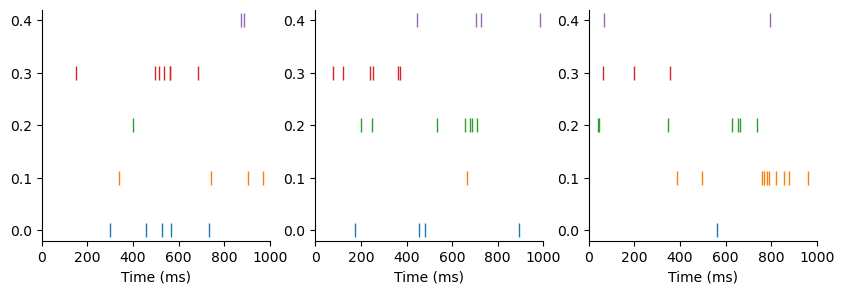

In [34]:
fig, axes = plt.subplots(1,3, figsize=(10, 3))

for k,v in trial_dict.items():
    idx = 0
    for trial in v:
        axes[k].plot(trial, np.ones(len(trial))*0.1*idx, '|', 
                  markersize=10, alpha=1)
        idx+=1

for ax in axes.flat:
# axes.set_ylim([0.05, 0.25])
    ax.set_xlim([0, 10000])
    ax.set_xlim([0, 1000])
    ax.set_xticks(np.linspace(0, 1000, 6))
    ax.set_xlabel('Time (ms)')
    #ax.set_xticklabels(np.linspace(0, 10, 6))

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'data_gen_spike_trains_30sec_trials.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'data_gen_spike_trains_30sec_trials.svg' , bbox_inches='tight')

### Lv examples

In [ ]:
rate_hz     = 5
tau_ms      = 100
alpha       = [0.001, 0.7]
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms,
        alpha_=alpha[trial],
        duration_ms_=duration_ms,
        seed_=trial  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains.append(spikes)

In [ ]:
# Generate a regular spike train with jitter
def generate_regular_spike_train_jitter(duration_ms, firing_rate_hz, jitter_std_ms, randomize_phase=False, seed=None):
    rng = np.random.default_rng(seed)
    isi = 1000.0 / firing_rate_hz
    offset = rng.uniform(0, isi) if randomize_phase else 0.0

    # Ideal periodic spike times
    ideal_spikes = np.arange(offset, duration_ms, isi)

    # Add Gaussian jitter
    jitter = rng.normal(0, jitter_std_ms, size=ideal_spikes.shape)
    jittered_spikes = ideal_spikes + jitter

    # Keep only spikes within the window
    valid_spikes = jittered_spikes[(jittered_spikes >= 0) & (jittered_spikes < duration_ms)]
    valid_spikes.sort()
    return valid_spikes

duration_ms    = 10 * 1000
firing_rate_hz = 5.0
jitter_std_ms  = 100 
spike_times = generate_regular_spike_train_jitter(
    duration_ms, firing_rate_hz, jitter_std_ms, randomize_phase=False, seed=42
)
print("Jittered spike times (ms):", spike_times)


In [ ]:
all_spike_trains.append(spike_times)

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(10, 3))

axes.plot(all_spike_trains[1], np.ones(len(all_spike_trains[1]))*0.1, '|', markersize=10, alpha=1)
axes.plot(all_spike_trains[0], np.ones(len(all_spike_trains[0]))*0.15, '|', markersize=10, alpha=1)
axes.plot(all_spike_trains[2], np.ones(len(all_spike_trains[2]))*0.2, '|', markersize=10, alpha=1)

axes.set_ylim([0.05, 0.25])
#axes.set_xlim([0, 10000])
axes.set_xlim([0, 10000])
axes.set_xticks(np.linspace(0, 10000, 11))
axes.set_xticklabels(np.linspace(0, 10, 11))

sns.despine()

In [ ]:
lv_l = []
for spike_train in all_spike_trains:
    spike_train_int = np.asarray([int(spike) for spike in spike_train])
    lv = get_lv(spike_train_int, False)
    lv_l.append(lv)
print(lv_l)

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(10, 3))

axes.plot(all_spike_trains[1], np.ones(len(all_spike_trains[1]))*0.1, '|', markersize=10, alpha=1, label='bursty')
axes.plot(all_spike_trains[0], np.ones(len(all_spike_trains[0]))*0.15, '|', markersize=10, alpha=1, label='random')
axes.plot(all_spike_trains[2], np.ones(len(all_spike_trains[2]))*0.2, '|', markersize=10, alpha=1, label='regular')

axes.set_ylim([0.05, 0.25])
#axes.set_xlim([0, 10000])
axes.set_xlim([5000, 10000])
axes.set_xticks(np.linspace(5000, 10000, 6))
axes.set_xticklabels(np.linspace(5, 10, 6))

fig.suptitle(f'Regular Lv={np.round(lv_l[2], 2)}, Random Lv={np.round(lv_l[0], 2)}, Bursty Lv={np.round(lv_l[1], 2)}')

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'data_gen_spike_trains_lv_5sec.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'data_gen_spike_trains_lv_5sec.svg' , bbox_inches='tight')